## Importing Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import zipfile
import wget
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from PIL import Image

# Data Preparatation
### Importing Nov_10.zip to workspace

In [3]:
wget.download("https://github.com/Call-for-Code/Spot-Challenge-Wildfires/raw/main/data/Nov_10.zip")
zip = zipfile.ZipFile("Nov_10.zip")
zip.extractall()

In [4]:
file_wildfires         = "Nov_10/Historical_Wildfires.csv"
file_weather           = "Nov_10/HistoricalWeather.csv"
file_weatherforecast   = "Nov_10/HistoricalWeatherForecasts.csv"
file_landclass         = "Nov_10/LandClass.csv"
file_vegetation        = "Nov_10/VegetationIndex.csv"


---
---

## Historical Wildfires

In [46]:
wildfires_df = pd.read_csv(file_wildfires)
wildfires_df['Date'] = pd.to_datetime(wildfires_df['Date'])

In [47]:
wildfires_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26406 entries, 0 to 26405
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Region                               26406 non-null  object        
 1   Date                                 26406 non-null  datetime64[ns]
 2   Estimated_fire_area                  26406 non-null  float64       
 3   Mean_estimated_fire_brightness       26406 non-null  float64       
 4   Mean_estimated_fire_radiative_power  26406 non-null  float64       
 5   Mean_confidence                      26406 non-null  float64       
 6   Std_confidence                       24199 non-null  float64       
 7   Var_confidence                       24199 non-null  float64       
 8   Count                                26406 non-null  int64         
 9   Replaced                             26406 non-null  object        
dtypes: datetim

In [48]:
print(wildfires_df["Date"].min())
print(wildfires_df["Date"].max())

2005-01-01 00:00:00
2020-10-31 00:00:00


In [49]:
### Before Cleaning
wildfires_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Estimated_fire_area,26406.0,144.297966,314.453847,1.0,8.911875,38.434091,146.951278,10120.943170
Mean_estimated_fire_brightness,26406.0,319.662078,8.862005,290.7,313.933333,319.784412,325.403144,381.950000
Mean_estimated_fire_radiative_power,26406.0,83.621258,67.510022,0.0,44.150391,67.133333,103.123611,2178.600000
Mean_confidence,26406.0,87.574735,4.371972,76.0,85.000000,87.771429,90.498403,100.000000
Std_confidence,24199.0,7.228302,1.995221,0.0,6.687010,7.707025,8.236665,16.970563
Var_confidence,24199.0,56.229092,25.898935,0.0,44.716106,59.398234,67.842642,288.000000
Count,26406.0,72.059305,150.973128,1.0,5.000000,20.000000,74.000000,3954.000000


### Check for duplicate rows

In [50]:
column_names = ["Region","Date"]
duplicates = wildfires_df.duplicated(subset = column_names , keep = False)
wildfires_df[duplicates]

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced


In [51]:
wildfires_df.dtypes

Region                                         object
Date                                   datetime64[ns]
Estimated_fire_area                           float64
Mean_estimated_fire_brightness                float64
Mean_estimated_fire_radiative_power           float64
Mean_confidence                               float64
Std_confidence                                float64
Var_confidence                                float64
Count                                           int64
Replaced                                       object
dtype: object

In [52]:
print("Number of records: {}".format(len(wildfires_df)))
print("Number of regions: {}\n".format(len(wildfires_df['Region'].unique())))
print(wildfires_df['Region'].unique())

Number of records: 26406
Number of regions: 7

['NSW' 'NT' 'QL' 'SA' 'TA' 'VI' 'WA']


In [53]:
## NSW = New South Wales
## NT  = Northern Territory
## QL  = Queensland
## SA  = South Australia
## TA  = Tasmania
## VI  = Victoria
## WA  = Western Australia

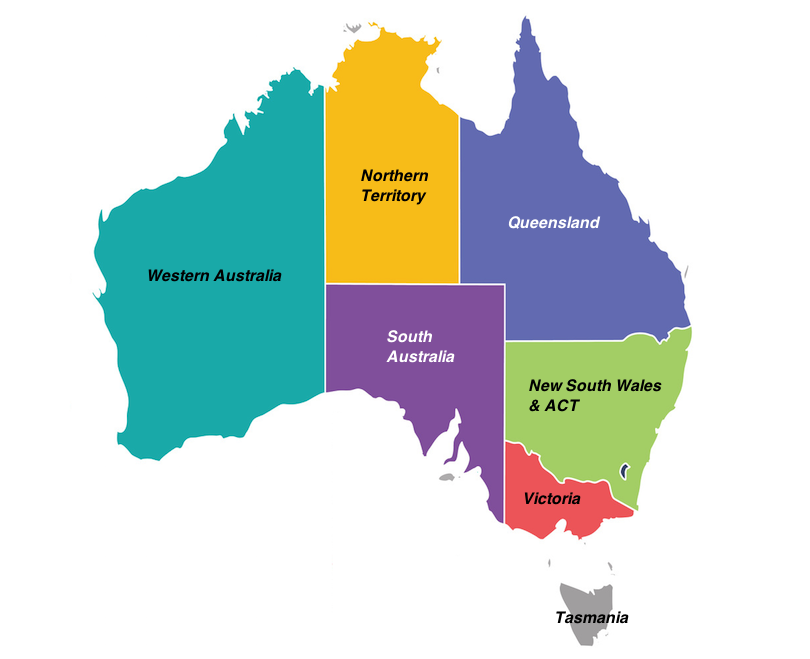

In [54]:
image = Image.open('australia.png')
display(image)

### Check for missing values

In [55]:
wildfires_df.isna().sum()

Region                                    0
Date                                      0
Estimated_fire_area                       0
Mean_estimated_fire_brightness            0
Mean_estimated_fire_radiative_power       0
Mean_confidence                           0
Std_confidence                         2207
Var_confidence                         2207
Count                                     0
Replaced                                  0
dtype: int64

<AxesSubplot:>

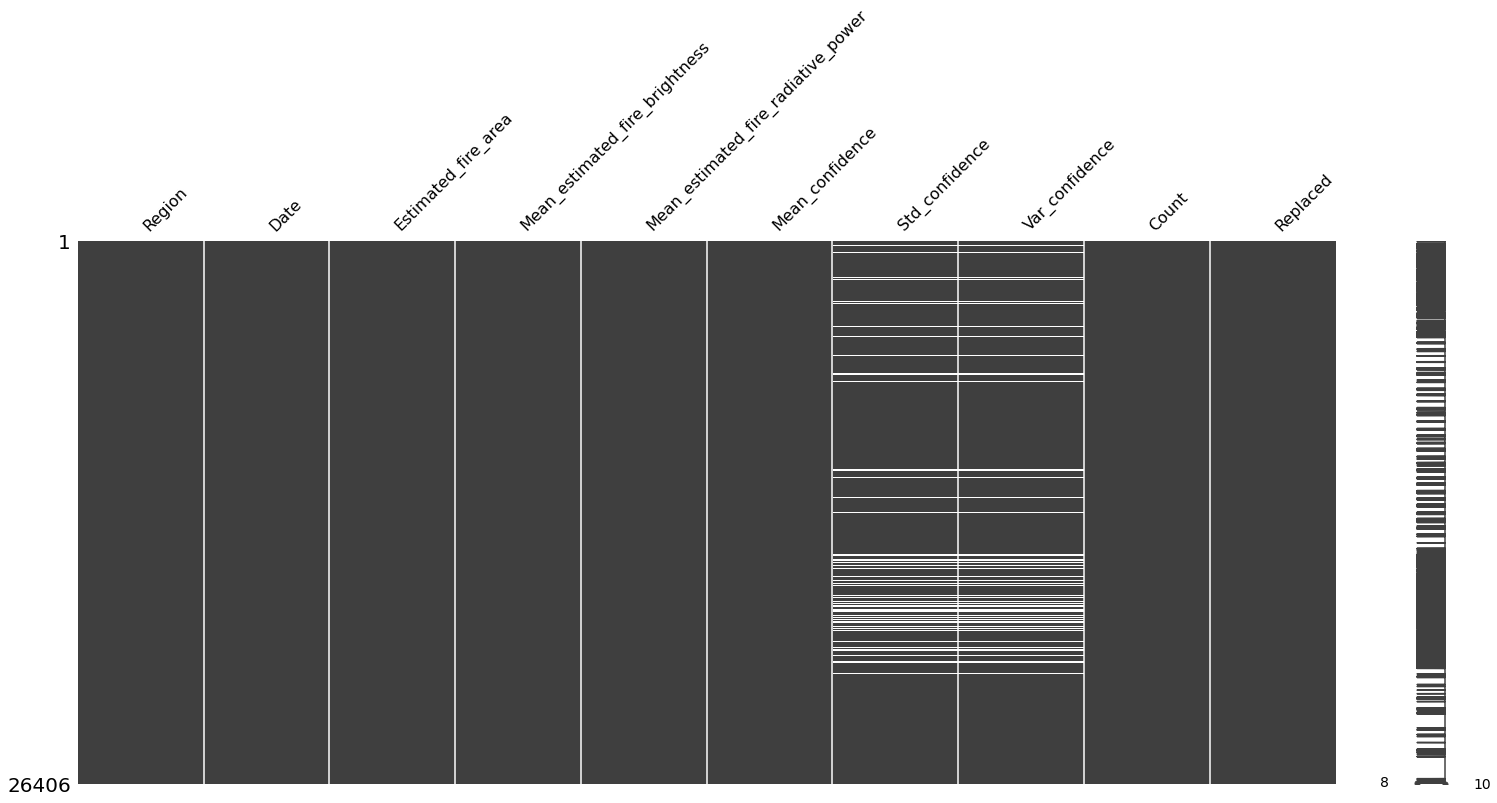

In [56]:
msno.matrix(wildfires_df)

In [57]:
wildfires_df[wildfires_df["Std_confidence"].isna() == True ]

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
48,NSW,2005-02-26,1.00,303.15,8.0,79.0,NaN,NaN,1,R
149,NSW,2005-06-12,1.00,302.55,17.9,79.0,NaN,NaN,1,R
154,NSW,2005-06-18,5.27,301.30,71.9,77.0,NaN,NaN,1,R
157,NSW,2005-06-25,9.60,300.70,145.9,76.0,NaN,NaN,1,R
163,NSW,2005-07-09,2.80,294.65,37.8,79.0,NaN,NaN,1,R
...,...,...,...,...,...,...,...,...,...,...
26327,WA,2020-08-09,2.34,300.15,30.2,85.0,NaN,NaN,1,N
26331,WA,2020-08-13,1.10,320.35,27.1,83.0,NaN,NaN,1,N
26332,WA,2020-08-14,1.00,302.15,15.8,77.0,NaN,NaN,1,N
26335,WA,2020-08-20,1.92,326.85,86.2,92.0,NaN,NaN,1,N


In [58]:
wildfires_df[wildfires_df["Var_confidence"].isna() == True ]

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
48,NSW,2005-02-26,1.00,303.15,8.0,79.0,NaN,NaN,1,R
149,NSW,2005-06-12,1.00,302.55,17.9,79.0,NaN,NaN,1,R
154,NSW,2005-06-18,5.27,301.30,71.9,77.0,NaN,NaN,1,R
157,NSW,2005-06-25,9.60,300.70,145.9,76.0,NaN,NaN,1,R
163,NSW,2005-07-09,2.80,294.65,37.8,79.0,NaN,NaN,1,R
...,...,...,...,...,...,...,...,...,...,...
26327,WA,2020-08-09,2.34,300.15,30.2,85.0,NaN,NaN,1,N
26331,WA,2020-08-13,1.10,320.35,27.1,83.0,NaN,NaN,1,N
26332,WA,2020-08-14,1.00,302.15,15.8,77.0,NaN,NaN,1,N
26335,WA,2020-08-20,1.92,326.85,86.2,92.0,NaN,NaN,1,N


In [59]:
## check ว่า SD กับ variance หายในแถวเดียวกันรึเปล่า
stdvar_intersect = wildfires_df["Std_confidence"].isna() & wildfires_df["Var_confidence"].isna()
intersect_df     = wildfires_df[stdvar_intersect]
columns = ['Region','Date','Count']
# เห็นว่าค่า count = 1 เลยเช็คดูว่าแถวอื่นมีค่า count อย่างไรบ้าง
duplicates = intersect_df.duplicated("Count", keep = False)
intersect_df  = intersect_df[duplicates]
print(intersect_df["Count"].unique())

[1]


In [60]:
#Count = 1 ----> Var&Std confidence = 0
wildfires_df.loc[wildfires_df["Std_confidence"].isna(), "Std_confidence"] = 0
wildfires_df.loc[wildfires_df["Var_confidence"].isna(), "Var_confidence"] = 0

In [61]:
### After Cleaning
wildfires_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Estimated_fire_area,26406.0,144.297966,314.453847,1.0,8.911875,38.434091,146.951278,10120.943170
Mean_estimated_fire_brightness,26406.0,319.662078,8.862005,290.7,313.933333,319.784412,325.403144,381.950000
Mean_estimated_fire_radiative_power,26406.0,83.621258,67.510022,0.0,44.150391,67.133333,103.123611,2178.600000
Mean_confidence,26406.0,87.574735,4.371972,76.0,85.000000,87.771429,90.498403,100.000000
Std_confidence,26406.0,6.624164,2.765905,0.0,6.047858,7.590685,8.185065,16.970563
Var_confidence,26406.0,51.529493,29.272316,0.0,36.576584,57.618503,66.995297,288.000000
Count,26406.0,72.059305,150.973128,1.0,5.000000,20.000000,74.000000,3954.000000


In [62]:
def cl_wildfires_df() :
    return wildfires_df

<AxesSubplot:>

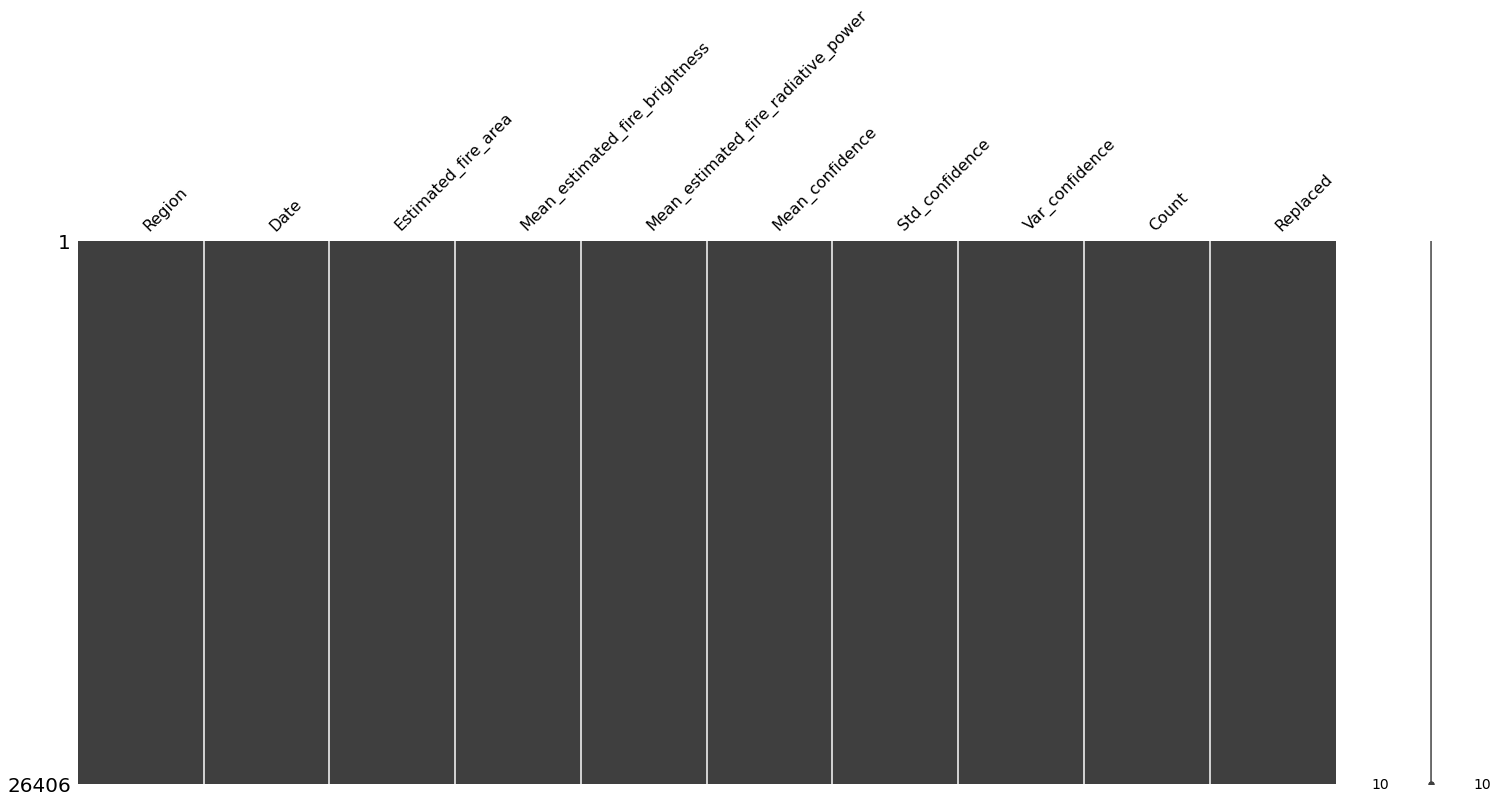

In [63]:
msno.matrix(cl_wildfires_df())

In [64]:
cl_wildfires_df().to_csv("Cleaned_HistoricalWildfires.csv") 

## Data Visualization

## Historical Weather

In [65]:
# rename columns
weather_df = pd.read_csv(file_weather)
weather_df = weather_df.rename(columns={"count()[unit: km^2]": "Area", "min()": "Min",
                                       "max()": "Max", "mean()": "Mean", "variance()": "Variance"})

weather_df['Date'] = pd.to_datetime(weather_df['Date'])

weather_df.head()

,Date,Region,Parameter,Area,Min,Max,Mean,Variance
0,2005-01-01,NSW,Precipitation,800234.348986,0.000000,1.836935,0.044274,0.028362
1,2005-01-01,NSW,RelativeHumidity,800234.348986,13.877194,80.522964,36.355567,253.559937
2,2005-01-01,NSW,SoilWaterContent,800234.348986,0.002245,0.414305,0.170931,0.007758
3,2005-01-01,NSW,SolarRadiation,800234.348986,14.515009,32.169781,26.749389,6.078587
4,2005-01-01,NSW,Temperature,800234.348986,14.485785,35.878704,27.341182,18.562212


In [66]:
print("Number of records: {}".format(len(weather_df)))
print("Number of regions: {}\n".format(len(weather_df['Region'].unique())))
print(weather_df['Region'].unique())

Number of records: 242781
Number of regions: 7

['NSW' 'NT' 'QL' 'SA' 'TA' 'VI' 'WA']


In [67]:
print(weather_df["Date"].min())
print(weather_df["Date"].max())

2005-01-01 00:00:00
2020-10-31 00:00:00


### Check for missing values

In [68]:
weather_df.isna().sum()

Date         0
Region       0
Parameter    0
Area         0
Min          0
Max          0
Mean         0
Variance     0
dtype: int64

In [69]:
# check the data types for each column
weather_df.dtypes

Date         datetime64[ns]
Region               object
Parameter            object
Area                float64
Min                 float64
Max                 float64
Mean                float64
Variance            float64
dtype: object

In [70]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242781 entries, 0 to 242780
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       242781 non-null  datetime64[ns]
 1   Region     242781 non-null  object        
 2   Parameter  242781 non-null  object        
 3   Area       242781 non-null  float64       
 4   Min        242781 non-null  float64       
 5   Max        242781 non-null  float64       
 6   Mean       242781 non-null  float64       
 7   Variance   242781 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 13.0+ MB


In [71]:
weather_df['Area'].unique()

array([ 800234.34898604, 1357560.87023056, 1730605.04292781,
        991315.10498463,   67785.26140857,  229453.17685432,
       2528545.65936048])

In [72]:
# Reformat the data
df_pivot = weather_df.pivot_table(values=['Min','Max','Mean','Variance'], index=['Date','Region'],
                                  columns=['Parameter'])
# Reset dataframe index
df_pivot.reset_index(inplace=True)

# Renaming Column names
df_pivot.columns = [col[0] if not(col[1]) else '{1}_{0}'.format(*col) for col in df_pivot.columns.values]

# Rearranging Data and column
params = df_pivot.columns.tolist()[3:]
params.sort()
weather_data = df_pivot[df_pivot.columns.tolist()[:3] + params].copy()
weather_data

,Date,Region,Precipitation_Max,Precipitation_Mean,Precipitation_Min,Precipitation_Variance,RelativeHumidity_Max,RelativeHumidity_Mean,RelativeHumidity_Min,RelativeHumidity_Variance,SoilWaterContent_Max,SoilWaterContent_Mean,SoilWaterContent_Min,SoilWaterContent_Variance,SolarRadiation_Max,SolarRadiation_Mean,SolarRadiation_Min,SolarRadiation_Variance,Temperature_Max,Temperature_Mean,Temperature_Min,Temperature_Variance,WindSpeed_Max,WindSpeed_Mean,WindSpeed_Min,WindSpeed_Variance
0,2005-01-01,NSW,1.836935,0.044274,0.000000,0.028362,80.522964,36.355567,13.877194,253.559937,0.414305,0.170931,0.002245,0.007758,32.169781,26.749389,14.515009,6.078587,35.878704,27.341182,14.485785,18.562212,7.670482,3.323550,1.354448,0.850048
1,2005-01-01,NT,315.266815,9.884958,0.000000,546.059262,95.683342,61.494675,14.558820,584.201131,0.496140,0.167735,0.000000,0.026743,31.634459,19.781791,2.518120,58.942658,38.136787,29.881492,24.179960,12.920252,9.704402,5.296892,1.840394,1.930014
2,2005-01-01,QL,74.452164,1.453053,0.000000,35.641257,95.898270,47.959364,14.443199,403.134377,0.472416,0.185641,0.000000,0.012679,31.982830,27.056979,6.033827,29.500832,37.047943,28.842866,20.951620,13.792599,7.675632,3.483753,1.106028,0.883048
3,2005-01-01,SA,3.193624,0.059078,0.000000,0.042837,81.980751,30.057683,10.618136,246.044713,0.263911,0.056047,0.000000,0.001917,31.734528,27.142643,17.861103,7.914246,38.326847,30.793675,14.095855,34.799336,10.044715,4.657538,2.023657,1.655908
4,2005-01-01,TA,13.604791,3.099497,0.003973,12.068597,81.501442,65.086764,43.906574,111.754034,0.368189,0.211360,0.000000,0.007121,33.225517,26.755711,20.742302,12.826400,16.228510,11.788805,6.686816,4.912013,11.432408,5.408138,1.995647,2.963118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40476,2020-10-31,QL,26.366877,0.386800,0.000000,4.229566,87.803581,35.829668,12.749949,316.368911,0.442840,0.141467,0.000000,0.006935,30.670065,28.745128,19.898029,4.796284,32.112972,24.777835,17.249844,8.811943,7.643718,3.137745,1.180556,0.549077
40477,2020-10-31,SA,0.259189,0.006940,0.000000,0.000492,82.642616,45.700218,12.512371,316.308826,0.436347,0.083082,0.000000,0.005425,29.623133,26.530568,15.608338,17.093209,26.117023,18.947783,9.948414,9.466862,7.620720,3.548225,2.062619,0.640926
40478,2020-10-31,TA,2.179307,0.472709,0.000703,0.243603,86.428932,77.645878,69.801094,10.936866,0.376833,0.264608,0.000000,0.009317,28.439209,21.782732,15.503663,8.718983,14.577375,11.648813,8.217092,2.388990,7.388186,2.501697,1.300771,0.859296
40479,2020-10-31,VI,11.436618,0.822028,0.000000,3.148454,93.374763,78.326366,66.459290,44.766480,0.455111,0.324260,0.000000,0.005050,28.041906,19.553751,11.170260,9.917196,17.307510,13.167147,9.186510,4.088503,6.605598,3.838360,1.783996,1.019079


In [73]:
weather_data.dtypes

Date                         datetime64[ns]
Region                               object
Precipitation_Max                   float64
Precipitation_Mean                  float64
Precipitation_Min                   float64
Precipitation_Variance              float64
RelativeHumidity_Max                float64
RelativeHumidity_Mean               float64
RelativeHumidity_Min                float64
RelativeHumidity_Variance           float64
SoilWaterContent_Max                float64
SoilWaterContent_Mean               float64
SoilWaterContent_Min                float64
SoilWaterContent_Variance           float64
SolarRadiation_Max                  float64
SolarRadiation_Mean                 float64
SolarRadiation_Min                  float64
SolarRadiation_Variance             float64
Temperature_Max                     float64
Temperature_Mean                    float64
Temperature_Min                     float64
Temperature_Variance                float64
WindSpeed_Max                   

In [74]:
weather_data.isna().any()
## columns that contain nulls are RelativeHumidity, Precipitation, SolarRadiation, Temperature and WindSpeed

Date                         False
Region                       False
Precipitation_Max             True
Precipitation_Mean            True
Precipitation_Min             True
Precipitation_Variance        True
RelativeHumidity_Max          True
RelativeHumidity_Mean         True
RelativeHumidity_Min          True
RelativeHumidity_Variance     True
SoilWaterContent_Max         False
SoilWaterContent_Mean        False
SoilWaterContent_Min         False
SoilWaterContent_Variance    False
SolarRadiation_Max            True
SolarRadiation_Mean           True
SolarRadiation_Min            True
SolarRadiation_Variance       True
Temperature_Max               True
Temperature_Mean              True
Temperature_Min               True
Temperature_Variance          True
WindSpeed_Max                 True
WindSpeed_Mean                True
WindSpeed_Min                 True
WindSpeed_Variance            True
dtype: bool

<AxesSubplot:>

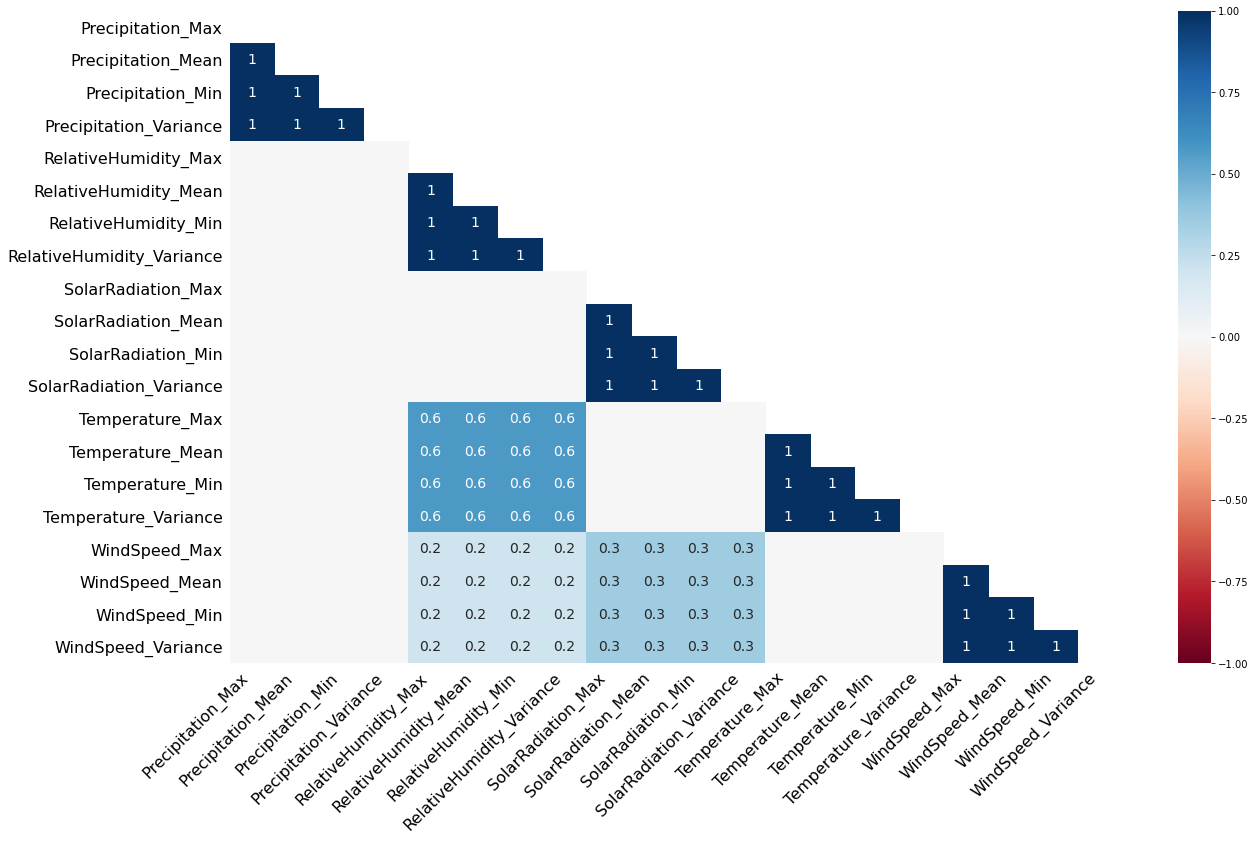

In [91]:
msno.heatmap(weather_data)

In [88]:
weather_data[weather_data["Precipitation_Max"].isna()]
#2019-06-22

,Date,Region,Precipitation_Max,Precipitation_Mean,Precipitation_Min,Precipitation_Variance,RelativeHumidity_Max,RelativeHumidity_Mean,RelativeHumidity_Min,RelativeHumidity_Variance,SoilWaterContent_Max,SoilWaterContent_Mean,SoilWaterContent_Min,SoilWaterContent_Variance,SolarRadiation_Max,SolarRadiation_Mean,SolarRadiation_Min,SolarRadiation_Variance,Temperature_Max,Temperature_Mean,Temperature_Min,Temperature_Variance,WindSpeed_Max,WindSpeed_Mean,WindSpeed_Min,WindSpeed_Variance
36995,2019-06-22,NSW,NaN,NaN,NaN,NaN,91.814453,68.422677,47.983139,114.312088,0.412930,0.206911,0.000723,0.008979,14.121369,11.564692,5.427815,2.390587,13.923991,6.138674,-0.300265,4.957193,9.339998,2.914745,1.048711,0.670847
36996,2019-06-22,NT,NaN,NaN,NaN,NaN,74.113892,30.802208,17.733223,125.066021,0.264075,0.067087,0.000000,0.003592,20.044704,17.438541,12.637497,2.493807,25.157646,14.323231,7.124587,17.841910,9.785229,4.616783,2.790959,0.821780
36997,2019-06-22,QL,NaN,NaN,NaN,NaN,83.852173,46.585385,21.653999,136.242906,0.407056,0.145537,0.000000,0.004564,18.989447,16.071312,10.554407,2.541980,25.403965,11.880667,4.738083,22.149479,9.982671,3.428681,1.280596,1.266645
36998,2019-06-22,SA,NaN,NaN,NaN,NaN,90.240486,50.957245,22.742420,189.151252,0.442534,0.085350,0.000000,0.006496,14.702800,12.181231,6.261038,2.518352,13.625819,8.601456,2.367725,2.724242,8.605908,3.424624,1.245013,1.113020
36999,2019-06-22,TA,NaN,NaN,NaN,NaN,97.402702,86.778359,68.310066,38.487720,0.388888,0.287726,0.000000,0.008860,8.307443,5.854250,4.417063,1.139942,11.469337,4.574910,-0.214279,6.325362,6.195638,1.771625,0.696300,0.857406
37000,2019-06-22,VI,NaN,NaN,NaN,NaN,96.209885,84.582572,63.882984,41.199200,0.469960,0.319544,0.000000,0.006050,10.392207,7.781152,5.230695,1.509120,11.801810,5.001564,0.078639,3.685770,6.246301,2.101499,0.802938,0.361891
37001,2019-06-22,WA,NaN,NaN,NaN,NaN,98.127876,39.120916,14.851243,467.014533,0.369130,0.074549,0.000000,0.004804,19.167070,11.886737,2.460803,13.936414,24.897877,18.152780,11.241782,6.561743,8.518429,4.775665,2.197379,1.324167


In [90]:
weather_data[weather_data["RelativeHumidity_Max"].isna()]
#2006-08-19
#2009-02-08
#2014-01-11
#2018-06-11
#2018-06-12
#2018-06-19

,Date,Region,Precipitation_Max,Precipitation_Mean,Precipitation_Min,Precipitation_Variance,RelativeHumidity_Max,RelativeHumidity_Mean,RelativeHumidity_Min,RelativeHumidity_Variance,SoilWaterContent_Max,SoilWaterContent_Mean,SoilWaterContent_Min,SoilWaterContent_Variance,SolarRadiation_Max,SolarRadiation_Mean,SolarRadiation_Min,SolarRadiation_Variance,Temperature_Max,Temperature_Mean,Temperature_Min,Temperature_Variance,WindSpeed_Max,WindSpeed_Mean,WindSpeed_Min,WindSpeed_Variance
4165,2006-08-19,NSW,5.449200,0.047475,0.000000,0.103268,NaN,NaN,NaN,NaN,0.351444,0.179532,1.129333e-03,0.006149,18.647676,16.310927,10.194108,4.271965,17.644295,9.641613,0.967949,7.459332,4.213328,2.308445,0.836806,0.189276
4166,2006-08-19,NT,0.264100,0.001280,0.000000,0.000143,NaN,NaN,NaN,NaN,0.293985,0.068126,2.043555e-06,0.003791,23.526985,21.581259,17.291561,1.270609,25.505045,19.497667,13.527777,8.550165,8.489419,3.466174,0.817809,0.707050
4167,2006-08-19,QL,1.947693,0.008666,0.000000,0.005799,NaN,NaN,NaN,NaN,0.396257,0.124570,2.043555e-06,0.003666,22.918108,20.219926,14.184232,2.051810,24.321589,18.480937,9.788080,6.671278,10.176150,2.893979,1.045502,0.703204
4168,2006-08-19,SA,0.828103,0.003671,0.000000,0.001177,NaN,NaN,NaN,NaN,0.398141,0.064067,2.043555e-06,0.003275,19.501968,17.004990,8.967422,2.074407,20.850836,15.690520,9.280705,7.754605,8.295160,3.754106,1.237808,1.247970
4169,2006-08-19,TA,10.133667,2.516017,0.000000,6.470552,NaN,NaN,NaN,NaN,0.422920,0.289349,2.043555e-06,0.010616,12.314164,8.716046,5.677072,2.596430,12.436457,7.332671,2.521077,3.853864,10.319861,4.225402,2.398384,1.945459
4170,2006-08-19,VI,2.756700,0.191253,0.000000,0.085903,NaN,NaN,NaN,NaN,0.412350,0.257799,2.043555e-06,0.006610,15.659929,11.671671,8.976295,2.087202,12.080028,8.605161,1.892626,5.069929,8.512889,2.884000,1.050229,0.726783
4171,2006-08-19,WA,18.652687,0.667146,0.000000,4.003953,NaN,NaN,NaN,NaN,0.378404,0.066912,2.043555e-06,0.004991,23.001118,18.325061,3.316105,16.270288,25.403555,20.512840,12.972297,7.344988,11.886468,4.073367,1.607898,0.796910
10493,2009-02-08,NSW,3.443802,0.096440,0.000000,0.111808,NaN,NaN,NaN,NaN,0.383857,0.149632,1.704425e-02,0.004283,31.312689,28.499942,18.516203,4.225705,NaN,NaN,NaN,NaN,9.101792,3.861615,1.108891,3.195680
10494,2009-02-08,NT,80.331871,7.512906,0.000000,120.248699,NaN,NaN,NaN,NaN,0.494226,0.178735,6.010911e-07,0.025239,30.037846,21.338024,5.833764,40.175295,NaN,NaN,NaN,NaN,10.320077,4.139762,0.988920,3.405661
10495,2009-02-08,QL,176.865433,9.807672,0.000000,279.584007,NaN,NaN,NaN,NaN,0.512477,0.253117,6.010911e-07,0.020698,30.783705,19.476571,2.483397,96.336519,NaN,NaN,NaN,NaN,8.917587,3.688307,0.638895,1.510411


In [92]:
weather_data[weather_data["SolarRadiation_Max"].isna()]
#2014-01-10
#2019-07-12

,Date,Region,Precipitation_Max,Precipitation_Mean,Precipitation_Min,Precipitation_Variance,RelativeHumidity_Max,RelativeHumidity_Mean,RelativeHumidity_Min,RelativeHumidity_Variance,SoilWaterContent_Max,SoilWaterContent_Mean,SoilWaterContent_Min,SoilWaterContent_Variance,SolarRadiation_Max,SolarRadiation_Mean,SolarRadiation_Min,SolarRadiation_Variance,Temperature_Max,Temperature_Mean,Temperature_Min,Temperature_Variance,WindSpeed_Max,WindSpeed_Mean,WindSpeed_Min,WindSpeed_Variance
23072,2014-01-10,NSW,10.895071,0.938572,0.000000,2.241003,89.633659,59.694873,29.384840,149.799068,0.432792,0.197198,0.018461,0.006925,NaN,NaN,NaN,NaN,31.516638,24.392267,16.417940,12.820380,6.691054,2.362805,0.940057,0.475424
23073,2014-01-10,NT,47.857388,2.244299,0.000000,26.985547,91.547150,41.132442,7.950668,706.994340,0.494473,0.091385,0.000000,0.007888,NaN,NaN,NaN,NaN,35.719051,30.989184,25.413406,5.120894,7.384636,3.376385,1.012642,0.833286
23074,2014-01-10,QL,47.535439,2.930275,0.000000,26.332500,95.728867,60.653026,20.423456,214.333600,0.469335,0.189738,0.000000,0.008140,NaN,NaN,NaN,NaN,35.825771,28.027184,18.896458,11.039082,8.387134,3.498604,1.222369,0.804438
23075,2014-01-10,SA,1.298525,0.009533,0.000000,0.003848,88.266151,31.242298,9.092833,252.479377,0.317290,0.059180,0.000000,0.001631,NaN,NaN,NaN,NaN,35.205112,29.731356,16.580805,14.432704,7.130739,4.139073,1.650077,1.070584
23076,2014-01-10,TA,2.403063,0.528451,0.000000,0.277987,88.572525,76.235461,62.165062,18.477304,0.368131,0.237504,0.000000,0.008099,NaN,NaN,NaN,NaN,21.475176,18.038382,15.112859,1.644815,6.658267,3.249015,1.643501,0.728856
23077,2014-01-10,VI,0.561948,0.030640,0.000000,0.006053,86.440704,52.809592,30.536663,129.305602,0.315022,0.186657,0.000000,0.003652,NaN,NaN,NaN,NaN,30.397165,23.957336,17.003201,8.293758,6.560230,2.652602,0.899806,0.650214
23078,2014-01-10,WA,2.306220,0.022227,0.000000,0.011111,87.589928,28.800903,6.914806,419.914635,0.317904,0.049843,0.000000,0.001510,NaN,NaN,NaN,NaN,38.669197,32.353415,18.156309,20.039287,11.053230,4.840927,1.377584,2.239877
37135,2019-07-12,NSW,37.750458,1.719036,0.000000,15.583590,93.159111,65.651329,48.169106,85.650032,0.470707,0.240526,0.005401,0.010050,NaN,NaN,NaN,NaN,17.132568,11.886754,2.292644,4.783523,NaN,NaN,NaN,NaN
37136,2019-07-12,NT,2.388077,0.018271,0.000000,0.021045,83.353996,35.106134,18.210396,198.954677,0.262138,0.058695,0.000000,0.003574,NaN,NaN,NaN,NaN,27.044968,19.480888,12.321455,14.075519,NaN,NaN,NaN,NaN
37137,2019-07-12,QL,2.198727,0.013224,0.000000,0.009111,87.916321,52.754183,24.495546,134.210051,0.448638,0.160327,0.000000,0.006809,NaN,NaN,NaN,NaN,25.035809,16.473898,10.031658,11.213843,NaN,NaN,NaN,NaN


In [94]:
weather_data[weather_data["Temperature_Max"].isna()]
#2009-02-08
#2018-06-19

,Date,Region,Precipitation_Max,Precipitation_Mean,Precipitation_Min,Precipitation_Variance,RelativeHumidity_Max,RelativeHumidity_Mean,RelativeHumidity_Min,RelativeHumidity_Variance,SoilWaterContent_Max,SoilWaterContent_Mean,SoilWaterContent_Min,SoilWaterContent_Variance,SolarRadiation_Max,SolarRadiation_Mean,SolarRadiation_Min,SolarRadiation_Variance,Temperature_Max,Temperature_Mean,Temperature_Min,Temperature_Variance,WindSpeed_Max,WindSpeed_Mean,WindSpeed_Min,WindSpeed_Variance
10493,2009-02-08,NSW,3.443802,0.096440,0.0,0.111808,NaN,NaN,NaN,NaN,0.383857,0.149632,1.704425e-02,0.004283,31.312689,28.499942,18.516203,4.225705,NaN,NaN,NaN,NaN,9.101792,3.861615,1.108891,3.195680
10494,2009-02-08,NT,80.331871,7.512906,0.0,120.248699,NaN,NaN,NaN,NaN,0.494226,0.178735,6.010911e-07,0.025239,30.037846,21.338024,5.833764,40.175295,NaN,NaN,NaN,NaN,10.320077,4.139762,0.988920,3.405661
10495,2009-02-08,QL,176.865433,9.807672,0.0,279.584007,NaN,NaN,NaN,NaN,0.512477,0.253117,6.010911e-07,0.020698,30.783705,19.476571,2.483397,96.336519,NaN,NaN,NaN,NaN,8.917587,3.688307,0.638895,1.510411
10496,2009-02-08,SA,1.049786,0.015489,0.0,0.005040,NaN,NaN,NaN,NaN,0.256353,0.060546,6.010911e-07,0.001751,30.332903,27.299430,16.878788,10.573555,NaN,NaN,NaN,NaN,11.238954,6.878877,1.923652,2.527251
10497,2009-02-08,TA,6.913176,1.033623,0.0,1.719551,NaN,NaN,NaN,NaN,0.364187,0.229636,6.010911e-07,0.008394,26.911438,21.995847,16.771393,6.214274,NaN,NaN,NaN,NaN,10.531963,4.759034,2.525351,2.148888
10498,2009-02-08,VI,5.414611,0.361654,0.0,0.502153,NaN,NaN,NaN,NaN,0.327845,0.171679,6.010911e-07,0.003085,29.266239,24.609960,17.236010,7.812433,NaN,NaN,NaN,NaN,9.120632,5.007785,2.073939,1.588085
10499,2009-02-08,WA,22.894337,0.710461,0.0,4.710052,NaN,NaN,NaN,NaN,0.477876,0.080486,6.010911e-07,0.006034,30.657774,26.453286,14.515725,9.805221,NaN,NaN,NaN,NaN,10.121881,6.069578,2.050614,3.458938
34419,2018-06-19,NSW,28.754610,0.347647,0.0,2.780286,NaN,NaN,NaN,NaN,0.417228,0.213582,3.328068e-03,0.010501,13.556427,10.198048,3.253069,5.565272,NaN,NaN,NaN,NaN,9.898138,2.797399,1.053749,1.183612
34420,2018-06-19,NT,1.732284,0.001350,0.0,0.000539,NaN,NaN,NaN,NaN,0.282540,0.067721,0.000000e+00,0.003760,19.234465,17.050411,11.142137,1.936097,NaN,NaN,NaN,NaN,9.185046,3.272381,1.700933,0.452138
34421,2018-06-19,QL,2.666157,0.010751,0.0,0.011031,NaN,NaN,NaN,NaN,0.367845,0.132323,0.000000e+00,0.004210,19.215368,16.228667,8.911916,3.343518,NaN,NaN,NaN,NaN,11.241320,3.401858,1.166037,0.713732


In [95]:
weather_data[weather_data["WindSpeed_Max"].isna()]
#2014-01-11
#2018-08-30
#2019-06-23
#2019-07-12

,Date,Region,Precipitation_Max,Precipitation_Mean,Precipitation_Min,Precipitation_Variance,RelativeHumidity_Max,RelativeHumidity_Mean,RelativeHumidity_Min,RelativeHumidity_Variance,SoilWaterContent_Max,SoilWaterContent_Mean,SoilWaterContent_Min,SoilWaterContent_Variance,SolarRadiation_Max,SolarRadiation_Mean,SolarRadiation_Min,SolarRadiation_Variance,Temperature_Max,Temperature_Mean,Temperature_Min,Temperature_Variance,WindSpeed_Max,WindSpeed_Mean,WindSpeed_Min,WindSpeed_Variance
23079,2014-01-11,NSW,22.616219,3.525315e-01,0.000000,3.202193e+00,NaN,NaN,NaN,NaN,0.449722,0.181117,1.000383e-02,0.006466,31.352379,26.904596,20.280558,3.752696,34.073612,27.123752,16.542017,15.122395,NaN,NaN,NaN,NaN
23080,2014-01-11,NT,56.171085,2.532166e+00,0.000000,3.488010e+01,NaN,NaN,NaN,NaN,0.492583,0.100128,1.450380e-06,0.009558,32.583427,25.646295,5.383792,35.602351,36.403324,31.653196,24.640850,9.984255,NaN,NaN,NaN,NaN
23081,2014-01-11,QL,47.706398,2.685785e+00,0.000000,2.604652e+01,NaN,NaN,NaN,NaN,0.464353,0.187188,1.450380e-06,0.008294,30.789627,22.651160,6.849568,24.182883,35.879440,28.405260,19.246315,10.611010,NaN,NaN,NaN,NaN
23082,2014-01-11,SA,0.233031,3.445345e-03,0.000000,2.282245e-04,NaN,NaN,NaN,NaN,0.308064,0.058231,1.450380e-06,0.001629,32.348873,30.689388,25.078632,1.551414,35.872139,29.824000,16.058010,25.866731,NaN,NaN,NaN,NaN
23083,2014-01-11,TA,1.997359,3.051802e-01,0.000000,1.683336e-01,NaN,NaN,NaN,NaN,0.356290,0.229945,1.450380e-06,0.007736,32.379429,26.357654,17.380087,17.659677,19.439056,15.841687,12.133097,3.219392,NaN,NaN,NaN,NaN
23084,2014-01-11,VI,0.514626,3.470988e-02,0.000000,3.907506e-03,NaN,NaN,NaN,NaN,0.309708,0.183643,1.450380e-06,0.003450,32.425442,29.401623,22.174706,6.380650,28.984259,21.055849,15.292752,14.471433,NaN,NaN,NaN,NaN
23085,2014-01-11,WA,4.001547,4.818665e-02,0.000000,4.522583e-02,NaN,NaN,NaN,NaN,0.300811,0.049235,1.450380e-06,0.001442,32.737457,30.684851,24.422668,3.544631,39.114246,32.895708,18.527662,17.374980,NaN,NaN,NaN,NaN
34923,2018-08-30,NSW,8.954411,9.050984e-01,0.000000,1.640033e+00,72.897034,36.587920,20.662346,185.374253,0.393261,0.188349,4.113206e-03,0.008767,20.743357,14.686422,4.588144,17.105040,22.098494,14.911229,4.686002,16.467245,NaN,NaN,NaN,NaN
34924,2018-08-30,NT,0.490597,1.082125e-02,0.000000,1.210068e-03,92.287971,38.199907,14.185917,212.019667,0.251978,0.058584,0.000000e+00,0.003050,23.686171,20.989451,11.565140,5.156827,28.304409,24.563505,13.533848,9.960035,NaN,NaN,NaN,NaN
34925,2018-08-30,QL,3.951879,7.732804e-02,0.000000,1.216574e-01,90.845245,41.933988,13.859876,217.401808,0.321586,0.116303,0.000000e+00,0.004458,24.082834,21.637566,16.899775,1.768119,28.096601,22.354482,11.287697,12.933619,NaN,NaN,NaN,NaN


## Function

In [75]:
# fill missing values with 0
weather_data_0 = weather_data.fillna(0)
def zerofill_weather() :
    return weather_data_0

In [111]:
weather_data_linear = df_pivot[df_pivot.columns.tolist()[:3] + params].copy()
weather_data_linear.interpolate(method = 'linear', inplace = True)
def linearfill_weather() :
    return weather_data_linear

In [135]:
weather_data_quadratic = df_pivot[df_pivot.columns.tolist()[:3] + params].copy()
weather_data_quadratic.interpolate(method = 'quadratic', inplace = True)
def quadraticfill_weather() :
    return weather_data_quadratic

---
---

## VegetationIndex

In [115]:
ndvi_df = pd.read_csv(file_vegetation)

# convert to datetime format
ndvi_df['Date'] = pd.to_datetime(ndvi_df['Date'])

print (ndvi_df.dtypes)
ndvi_df.head()

Region                               object
Date                         datetime64[ns]
Vegetation_index_mean               float64
Vegetation_index_max                float64
Vegetation_index_min                float64
Vegetation_index_std                float64
Vegetation_index_variance           float64
dtype: object


,Region,Date,Vegetation_index_mean,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance
0,NSW,2005-01-01,0.349202,0.9972,-0.2,0.204862,0.041968
1,NSW,2005-02-01,0.357403,0.9772,-0.2,0.208673,0.043544
2,NSW,2005-03-01,0.354087,0.9750,-0.2,0.209450,0.043869
3,NSW,2005-04-01,0.347242,0.9904,-0.2,0.207307,0.042976
4,NSW,2005-05-01,0.345526,0.9972,-0.2,0.202858,0.041151


In [116]:
ndvi_df1 = pd.read_csv(file_vegetation)


In [117]:
ndvi_df['Region'].unique()

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

In [118]:
print(ndvi_df["Date"].min())
print(ndvi_df["Date"].max())

2005-01-01 00:00:00
2020-10-01 00:00:00


### Check for missing values

In [119]:
ndvi_df.isna().sum()

Region                       0
Date                         0
Vegetation_index_mean        0
Vegetation_index_max         0
Vegetation_index_min         0
Vegetation_index_std         0
Vegetation_index_variance    0
dtype: int64

---
---

In [120]:
forecasts_df = pd.read_csv(file_weatherforecast)
forecasts_df['Date'] = pd.to_datetime(forecasts_df['Date'])

forecasts_df.head()

,Date,Region,Parameter,Lead time,count()[unit: km^2],min(),max(),mean(),variance()
0,2014-01-01,NSW,RelativeHumidity,5,8.037682e+05,7.482927,85.021118,28.223569,353.620815
1,2014-01-01,NSW,SolarRadiation,5,8.037682e+05,24.865765,33.557598,31.647308,2.276068
2,2014-01-01,NSW,Temperature,5,8.037682e+05,21.243755,36.929035,30.893523,17.918553
3,2014-01-01,NSW,WindSpeed,5,8.037682e+05,1.593531,6.989559,3.958822,1.334834
4,2014-01-01,NT,RelativeHumidity,5,1.349817e+06,14.796251,73.601479,39.799856,189.805002


In [121]:
# check how many predictions there are for each day
forecasts_df['Lead time'].unique()

array([ 5, 10, 15], dtype=int64)

In [122]:
# select data for one month in one region
d1 = '2020-01-01'
d2 ='2020-01-31'
r1 = 'NSW'

forecast1 = forecasts_df[(forecasts_df['Parameter']== 'Temperature') & (forecasts_df['Region']== r1)]
forecast1 = forecast1.set_index(['Date'])
forecast2 = forecast1.loc[d1:d2]
forecast2.head()

,Region,Parameter,Lead time,count()[unit: km^2],min(),max(),mean(),variance()
Date,,,,,,,,
2020-01-01,NSW,Temperature,5,803768.19762,16.968477,36.773914,28.557132,19.421144
2020-01-01,NSW,Temperature,10,803768.19762,17.254169,37.626869,30.319687,23.231273
2020-01-01,NSW,Temperature,15,803768.19762,13.469310,31.969305,25.005007,15.987917
2020-01-02,NSW,Temperature,5,803768.19762,17.931461,36.084873,28.821793,18.558279
2020-01-02,NSW,Temperature,10,803768.19762,22.026365,39.552299,32.804822,16.355089


In [123]:
# also find the observed weather for the same period
weather_data_NSW = weather_data[weather_data['Region']=='NSW']

weather_data_NSW = weather_data_NSW.set_index(['Date'])
obs1 = weather_data_NSW.loc[d1:d2]
obs1.head()

,Region,Precipitation_Max,Precipitation_Mean,Precipitation_Min,Precipitation_Variance,RelativeHumidity_Max,RelativeHumidity_Mean,RelativeHumidity_Min,RelativeHumidity_Variance,SoilWaterContent_Max,SoilWaterContent_Mean,SoilWaterContent_Min,SoilWaterContent_Variance,SolarRadiation_Max,SolarRadiation_Mean,SolarRadiation_Min,SolarRadiation_Variance,Temperature_Max,Temperature_Mean,Temperature_Min,Temperature_Variance,WindSpeed_Max,WindSpeed_Mean,WindSpeed_Min,WindSpeed_Variance
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-01,NSW,3.668878,0.104289,0.0,0.146458,87.861794,30.291005,9.313578,386.401715,0.371896,0.138887,1.769513e-07,0.004094,34.879402,31.403235,20.980911,7.032370,37.017212,27.529635,14.403704,22.500503,6.587991,3.676050,1.145814,1.303046
2020-01-02,NSW,9.917132,0.253864,0.0,0.791259,91.251701,32.660449,7.294895,482.728062,0.373327,0.139606,0.000000e+00,0.004303,34.744717,31.504156,15.077473,8.872809,37.096256,28.886042,16.416523,22.007675,5.088723,3.265463,1.213501,0.574784
2020-01-03,NSW,1.681688,0.008512,0.0,0.005425,92.480141,27.166641,8.112389,317.563760,0.365096,0.137411,3.398784e-06,0.004185,34.468590,31.086181,26.110308,3.316400,39.985939,33.062747,19.849518,24.481774,7.190868,3.378213,1.395510,0.909916
2020-01-04,NSW,2.313565,0.065815,0.0,0.035870,74.164299,27.930265,14.596614,109.453610,0.354865,0.136301,1.286095e-06,0.003828,32.717640,29.393158,23.636795,3.551130,38.673840,31.853675,17.847557,19.003532,10.106893,4.620599,1.300415,3.281027
2020-01-05,NSW,10.003880,0.517439,0.0,0.956188,89.230743,45.874684,15.099000,329.066449,0.351612,0.143267,0.000000e+00,0.003660,32.277187,26.195694,8.245476,25.448863,36.978390,25.410221,10.446896,41.178617,8.764172,5.107051,1.278539,2.318480
